### Loading the Data

First We install the needed libraries, and import the csv data downloaded from Yahoo Finance

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm          # With scipi we can get the PDF and CDF

In [2]:
# We will read and parse the data.
spx = pd.read_csv("Data/INDEXSP500.csv", parse_dates=['Date'])  # Read the CSV file while parsing dates
spx.set_index('Date', inplace=True)                             # Set the Date column as the index

### Exploratory Data Analysis and Data Cleaning

In [3]:
print(spx.index.min())
print(spx.index.max())

1983-01-03 00:00:00
2023-12-29 00:00:00


In [4]:
# Sort so the DatetimeIndex is sorted in ascending order.
spx.sort_index(inplace=True)

spx.head()

,Open,High,Low,Close
Date,,,,
1983-01-03,138.34,142.13,137.72,138.34
1983-01-04,141.35,141.93,137.30,141.35
1983-01-05,141.96,142.59,141.49,141.96
1983-01-06,145.27,146.69,141.60,145.27
1983-01-07,145.18,147.62,143.75,145.18


In [5]:
spx.tail()

,Open,High,Low,Close
Date,,,,
2023-12-22,4753.92,4772.94,4736.77,4754.63
2023-12-26,4758.86,4784.72,4758.45,4774.75
2023-12-27,4773.45,4785.39,4768.90,4781.58
2023-12-28,4786.44,4793.30,4780.98,4783.35
2023-12-29,4782.88,4788.43,4751.99,4769.83


In [6]:
spx.index       # The DataFrame is indexed by dates, which is suitable for time series data analysis

DatetimeIndex(['1983-01-03', '1983-01-04', '1983-01-05', '1983-01-06',
               '1983-01-07', '1983-01-10', '1983-01-11', '1983-01-12',
               '1983-01-13', '1983-01-14',
               ...
               '2023-12-15', '2023-12-18', '2023-12-19', '2023-12-20',
               '2023-12-21', '2023-12-22', '2023-12-26', '2023-12-27',
               '2023-12-28', '2023-12-29'],
              dtype='datetime64[ns]', name='Date', length=10334, freq=None)

In [7]:
spx.shape

(10334, 4)

In [8]:
spx.columns

Index([' Open', ' High', ' Low', ' Close'], dtype='object')

In [9]:
# We notice some inconvenient spaces at the beginning of column names so we rename them:
spx.columns = ['Open', 'High', 'Low', 'Close']
spx.columns

Index(['Open', 'High', 'Low', 'Close'], dtype='object')

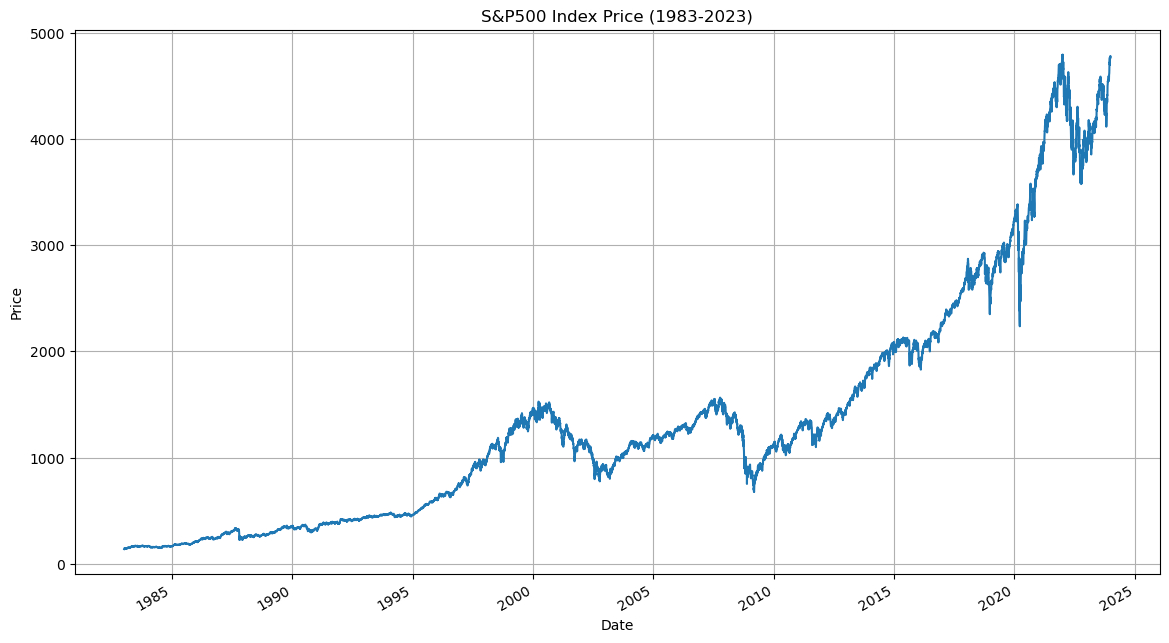

In [10]:
plt.figure(figsize=(14, 8))
spx.loc['1983-01-01':'2023-12-31','Close'].plot()

plt.title('S&P500 Index Price (1983-2023)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)

In [11]:
# We calculate a few Moving Averages, using 'rolling' to choose the days
spx['MA10'] = spx['Close'].rolling(10).mean()     # MA of the last 10 days
spx['MA50'] = spx['Close'].rolling(50).mean()     # MA of the last 50 days
spx['MA200'] = spx['Close'].rolling(200).mean()   # MA of the last 200 days

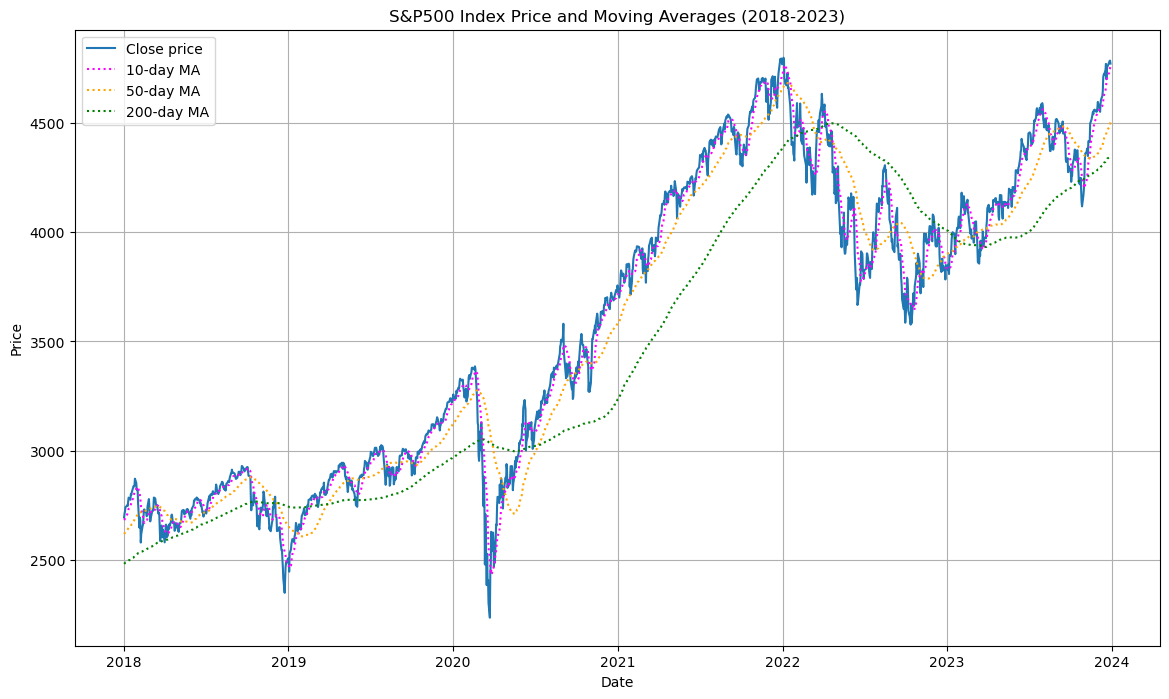

In [12]:
plt.figure(figsize=(14, 8))
#spx.loc['1983-01-01':'2023-12-31','Close'].plot()

plt.plot(spx.loc['2018-01-01':'2023-12-31','Close'], label ='Close price') 
plt.plot(spx.loc['2018-01-01':'2023-12-31','MA10'], label='10-day MA', color = 'magenta', linestyle=':')
plt.plot(spx.loc['2018-01-01':'2023-12-31','MA50'], label='50-day MA', color = 'orange', linestyle=':')
plt.plot(spx.loc['2018-01-01':'2023-12-31','MA200'], label='200-day MA', color = 'green', linestyle=':')

plt.title('S&P500 Index Price and Moving Averages (2018-2023)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

### Models of Distribution

In [13]:
# We calculate the log returns. Financial returns are generally forward-looking, meaning we are interested in the return we'd realize from holding the asset one more day.
# These represent continuously compounded returns, as they are reinvested over time (which are easier to work with in statistical models).
# They are symmetrical and can handle negative values better compared to simple percentage returns. 
# They are also normalized, which makes them suitable for comparing across different stocks or assets.

# Calculating the log daily return for S&P500
spx['LogReturn'] = np.log(spx['Close']).shift(-1) - np.log(spx['Close'])

<AxesSubplot:>

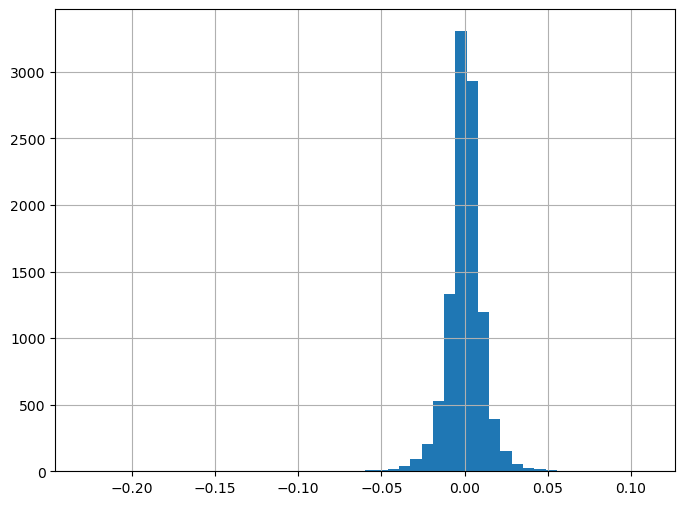

In [14]:
# We plot the distribution of the log Returns
spx['LogReturn'].hist(bins=50, figsize=(8,6))

In [15]:
# Calculate mean and standard deviation of the log returns
mu = spx['LogReturn'].mean()           # Calculating the Mean
sigma = spx['LogReturn'].std(ddof=1)   # Calculating the Standard Dev (ddof=1 for sample, ddof=0 for population. We usually consider financial data as samples; it's finite representation)
print('mu:',mu,'sigma:',sigma)

mu: 0.0003426257157322996 sigma: 0.011435896809217602


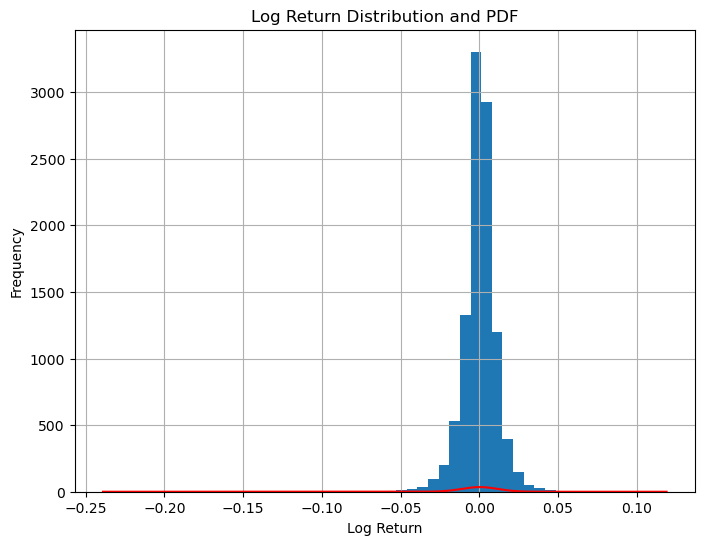

In [16]:
# Create a DataFrame for density calculations
density = pd.DataFrame()
density['x'] = np.arange(spx['LogReturn'].min()-0.01, spx['LogReturn'].max()+0.01, 0.001)
density['pdf'] = norm.pdf(density['x'], mu, sigma)  # Get PDF: Probability Density Function, using mu and sigma as parameters
density['cdf'] = norm.cdf(density['x'], mu, sigma)  # Get CDF: Cumulative Distribution Function, using mu and sigma as parameters

# Plot the log returns histogram and the PDF
spx['LogReturn'].hist(bins=50, figsize=(8,6))
plt.plot(density['x'], density['pdf'], color='red')  # Plotting the PDF in red
plt.xlabel('Log Return')
plt.ylabel('Frequency')
plt.title('Log Return Distribution and PDF')
plt.show()

The PDF describes the likelihood of a random variable to take on a particular value. 
For continuous distributions, the PDF value at any given point represents the relative likelihood of the variable being near that point.

The CDF describes the probability that a random variable will take a value less than or equal to a specific value. It is obtained by integrating the PDF from the leftmost bound up to that specific value. The CDF is always a non-decreasing function ranging from 0 to 1.

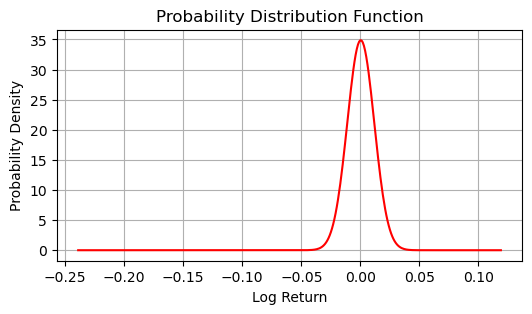

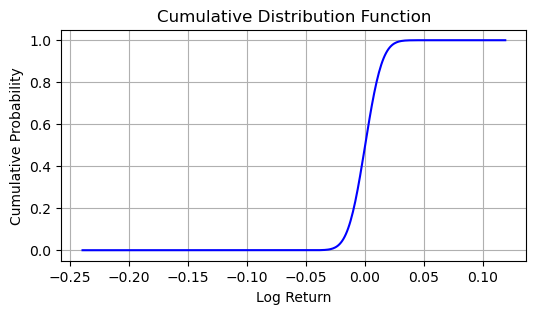

In [17]:
# Plotting the PDF
plt.figure(figsize=(6, 3))
plt.plot(density['x'], density['pdf'], color='red')
plt.xlabel('Log Return')
plt.ylabel('Probability Density')
plt.title('Probability Distribution Function')
plt.grid(True)
plt.show()
# Plotting the CDF
plt.figure(figsize=(6, 3))
plt.plot(density['x'], density['cdf'], color='blue')
plt.xlabel('Log Return')
plt.ylabel('Cumulative Probability')
plt.title('Cumulative Distribution Function')
plt.grid(True)
plt.show()

The CDF can help in calculating quantiles (e.g., the median, quartiles) and in estimating the probability of returns falling within a specific range.
In risk management, the CDF is used to calculate the Value at Risk; a measure of potential loss in value of a portfolio.

### Calculating the probability of the Index price changes

In [18]:
# probability that the S&P500 will drop over 2% in a day
prob_return1 = norm.cdf(-0.02, mu, sigma)           # calculate the cumulative probability up to -0.02
print('The Probability is ', f"{prob_return1:.2%}")

The Probability is  3.76%


In [19]:
# probability that the S&P500 will increase over 2% in a day
prob_return2 = 1 - norm.cdf(0.02, mu, sigma)
print('The Probability is ', f"{prob_return2:.2%}")

The Probability is  4.28%


In [20]:
# probability that the S&P500 will drop over 5% in a day
prob_return3 = norm.cdf(-0.05, mu, sigma)           
print('The Probability is ', f"{prob_return3:.5%}")

The Probability is  0.00054%


In [21]:
# probability that the S&P500 will increase over 5% in a day
prob_return4 = 1 - norm.cdf(0.05, mu, sigma)
print('The Probability is ', f"{prob_return4:.5%}")

The Probability is  0.00071%


In [22]:
# drop over 10% in 365 days
mu365 = 365*mu                          # annualized mean of the log returns
sigma365 = (365**0.5) * sigma           # annualized standard deviation of log returns
drop10 = norm.cdf(-0.1, mu365, sigma365)
print('The probability of dropping over 20% in 220 days is ', drop10)

The probability of dropping over 20% in 220 days is  0.15148200400141143


In [23]:
# increase over 10% in 365 days
mu365 = 365*mu
sigma365 = (365**0.5) * sigma
incr10 = 1- norm.cdf(-0.1, mu365, sigma365)
print('The probability of dropping over 20% in 220 days is ', incr10)

The probability of dropping over 20% in 220 days is  0.8485179959985886


### Calculating the Value at risk (VaR)

In [24]:
# Value at Risk (VaR)
VaR = norm.ppf(0.05, mu, sigma)           # Using PPF, the Percent point function of a normal distribution (the inverse of the CDF)
print('Single day Value at Risk ', VaR)

Single day Value at Risk  -0.01846775062835205


In [25]:
# The PPF; norm.ppf(q, mu, sigma) is the inverse of the CDF. 
# It gives the value x such that the probability of the variable being less than or equal to x is q
# This is used to find quantiles

# Quantiles 
# 5% quantile
print('5% quantile ', norm.ppf(0.05, mu, sigma))
# 95% quantile
print('95% quantile ', norm.ppf(0.95, mu, sigma))

5% quantile  -0.01846775062835205
95% quantile  0.01915300205981664


In [60]:
# 25% quantile
q25 = norm.ppf(0.25, mu, sigma)
print('25% quantile ', q25)
# 75% quantile
q75 = norm.ppf(0.75, mu, sigma) 
print('75% quantile ', q75)

25% quantile  -0.007370769466385048
75% quantile  0.008056020897849648
